In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import log
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf
from datetime import datetime, timedelta

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('Variavel_out.xlsx', sheet_name='LookerStudio')
print(df.tail(10))

     Index     peso  comprimento_Total  comprimento_Padrao  \
937    NaN  1013.74               36.0                30.3   
938    NaN   795.64               34.5                28.3   
939    NaN   911.28               35.5                29.8   
940    NaN   898.40               36.0                30.2   
941    NaN   810.48               34.5                28.6   
942    NaN   822.67               36.0                30.6   
943    NaN   653.60               32.0                26.7   
944    NaN   905.54               35.2                28.8   
945    NaN   754.89               33.3                29.4   
946    NaN   756.22               33.3                28.2   

     comprimento_Cabeça  altura  espessura  
937                 9.8    11.6        3.5  
938                 9.2    10.8        3.2  
939                 8.2    10.8        3.1  
940                 9.5    10.7        3.0  
941                 9.5    10.2        3.1  
942                 9.0    10.6        3.2  
94

In [3]:
# Dropping the columns
df2 = df.drop(columns=[
'Index',
'espessura'
])
df2.head()

,peso,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura
0,51.45,14.3,12.2,4.0,4.1
1,37.15,12.4,10.9,3.8,3.2
2,47.26,13.7,11.2,3.4,4.0
3,36.67,12.9,11.1,3.7,3.7
4,45.48,13.2,11.3,3.8,4.5


In [4]:
####### BLIND TEST

#data = df2.sample(frac=0.95, random_state=123)
#data_unseen = df2.drop(data.index)

#data.reset_index(drop=True, inplace=True)
#data_unseen.reset_index(drop=True, inplace=True)

#print('Data for Modeling: ' + str(data.shape))
#print('Unseen Data For Predictions: ' + str(data_unseen.shape))

In [5]:
from pycaret.regression import *
#### DATA for BLIND TEST
#exp2= setup(data = data,  target = 'peso')

exp2= setup(data = df2,  target = 'peso', remove_outliers = True, train_size=0.8)
#exp2= setup(data = df2,  target = 'peso', remove_outliers = True, remove_multicollinearity = True, multicollinearity_threshold = 0.7)
best_model = exp2.compare_models()

,Description,Value
0,Session id,3233
1,Target,peso
2,Target type,Regression
3,Original data shape,"(947, 5)"
4,Transformed data shape,"(909, 5)"
5,Transformed train set shape,"(719, 5)"
6,Transformed test set shape,"(190, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,19.5629,1287.5316,35.3279,0.9798,0.0862,0.0616,0.0540
lightgbm,Light Gradient Boosting Machine,20.0969,1300.8676,35.6815,0.9794,0.0828,0.0619,0.1670
rf,Random Forest Regressor,19.9474,1308.1678,35.6826,0.9793,0.0826,0.0601,0.1110
et,Extra Trees Regressor,19.8969,1336.2934,35.9824,0.9788,0.0844,0.0602,0.0880
gbr,Gradient Boosting Regressor,20.7317,1408.2643,37.0014,0.9777,0.0855,0.0643,0.0800
xgboost,Extreme Gradient Boosting,22.6941,1639.6402,39.6533,0.9738,0.0923,0.0676,0.1710
ada,AdaBoost Regressor,31.2483,2031.1684,44.7967,0.9682,0.2430,0.1946,0.0780
dt,Decision Tree Regressor,25.9428,2094.7563,45.3092,0.9671,0.1103,0.0791,0.0550
en,Elastic Net,52.3825,4685.9870,68.2891,0.9273,0.3279,0.4004,0.0490
llar,Lasso Least Angle Regression,52.4437,4734.5454,68.5929,0.9266,0.3377,0.4060,0.0600


In [6]:
rf = exp2.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,20.1681,1329.7514,36.4658,0.9781,0.0822,0.0669
1,20.2045,2231.4768,47.2385,0.9613,0.1163,0.0690
2,19.2820,1093.8798,33.0739,0.9846,0.0725,0.0568
3,21.9211,1515.0306,38.9234,0.9783,0.0885,0.0683
4,19.4286,934.8724,30.5757,0.9852,0.0708,0.0596
5,19.4650,1086.1630,32.9570,0.9856,0.0730,0.0524
6,19.6429,1184.2583,34.4131,0.9806,0.0706,0.0568
7,21.1568,1380.2430,37.1516,0.9788,0.0808,0.0628
8,16.6385,725.1320,26.9283,0.9894,0.0820,0.0587


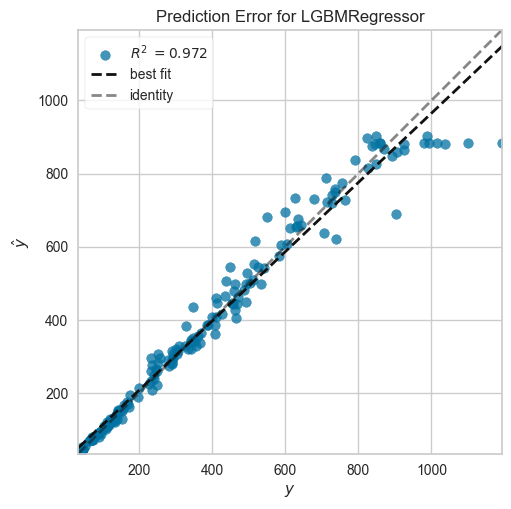

In [7]:
exp2.plot_model(rf, plot = 'error')

In [8]:
exp2.evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [9]:
peso_pred_semEspe = exp2.predict_model(rf)
peso_pred_semEspe.tail(10)

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
26,12.400000,10.700000,3.4,4.0,39.540001,37.748833
461,21.400000,17.799999,6.0,6.9,226.399994,225.454562
59,13.200000,11.000000,3.3,4.1,43.130001,43.471108
119,12.500000,10.600000,3.2,3.8,36.230000,37.480486
726,26.799999,22.799999,7.8,8.4,411.170013,407.738925
773,26.200001,21.799999,8.0,8.8,464.299988,405.765299
929,35.700001,29.000000,9.6,11.5,924.950012,863.151636
781,29.799999,26.100000,8.0,8.6,496.079987,526.975555
22,12.400000,10.500000,3.6,3.8,39.650002,34.056867
270,20.000000,16.100000,5.1,5.4,142.539993,152.832817


In [10]:
peso_pred_semEspe.head()

,comprimento_Total,comprimento_Padrao,comprimento_Cabeça,altura,peso,prediction_label
903,32.000000,26.400000,8.9,9.9,704.859985,638.423898
946,33.299999,28.200001,8.7,10.1,756.219971,774.439601
935,32.799999,27.299999,8.8,9.9,612.900024,650.548568
194,14.500000,12.800000,4.1,4.5,63.840000,68.793570
600,25.700001,21.400000,6.5,6.5,365.989990,337.760255


# Continuidade do Modelo

In [36]:
### Saving model 

#save_model(rf, 'rf_weight') 


In [37]:
################### LOADING MODEL
saved_rf = load_model('rf_weight') 

saved_rf 

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\crist\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['comprimento_Total',
                                             'comprimento_Padrao',
                                             'comprimento_Cabeca', 'altura'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 RandomForestRegressor(n_jobs=-1, random_state=8604))])

In [38]:
exp2.predict_model(saved_rf)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- comprimento_Cabeça
Feature names seen at fit time, yet now missing:
- comprimento_Cabeca


In [13]:
##################### BLIND TEST
#pred_unseen = predict_model(rf, data = data_unseen)
#pred_unseen.head(5)